<a href="https://colab.research.google.com/github/Kirknasty54/Jackson_Kirkpatrick_ICP7/blob/main/Jackson_Kirkpatrick_ICP7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import max_norm
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import utils
#from keras import backend as K
#K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               4194816   
                                                      

In [4]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# Compile model
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_9 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 64)        0         
                                                      

Epoch 1/10
1563/1563 [==============================] - 390s 249ms/step - loss: 0.5421 - accuracy: 0.8116 - val_loss: 0.7764 - val_accuracy: 0.7378
Epoch 2/10
1563/1563 [==============================] - 393s 252ms/step - loss: 0.5112 - accuracy: 0.8219 - val_loss: 0.7822 - val_accuracy: 0.7441
Epoch 3/10
1563/1563 [==============================] - 389s 249ms/step - loss: 0.4976 - accuracy: 0.8265 - val_loss: 0.7783 - val_accuracy: 0.7445
Epoch 4/10
1563/1563 [==============================] - 394s 252ms/step - loss: 0.4773 - accuracy: 0.8352 - val_loss: 0.7673 - val_accuracy: 0.7516
Epoch 5/10
1563/1563 [==============================] - 393s 252ms/step - loss: 0.4689 - accuracy: 0.8367 - val_loss: 0.7849 - val_accuracy: 0.7494
Epoch 6/10
1563/1563 [==============================] - 391s 250ms/step - loss: 0.4607 - accuracy: 0.8396 - val_loss: 0.8365 - val_accuracy: 0.7377
Epoch 7/10
1563/1563 [==============================] - 393s 251ms/step - loss: 0.4516 - accuracy: 0.8449 - val_

KeyError: ignored

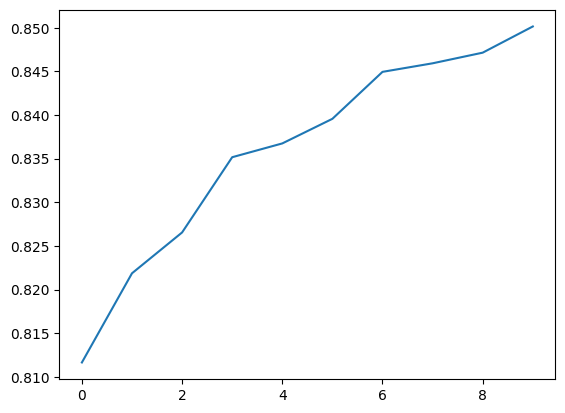

In [43]:
import matplotlib.pyplot as plt
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epochs, batch_size = 32)

# Predict the first 4 images
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = numpy.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class labels
actual_labels = numpy.argmax(y_test[:4], axis=1)

# Compare and print the results
for i in range(4):
    print(f"Predicted Label: {predicted_labels[i]}, Actual Label: {actual_labels[i]}")

plt.plot(history.history['accuracy'])


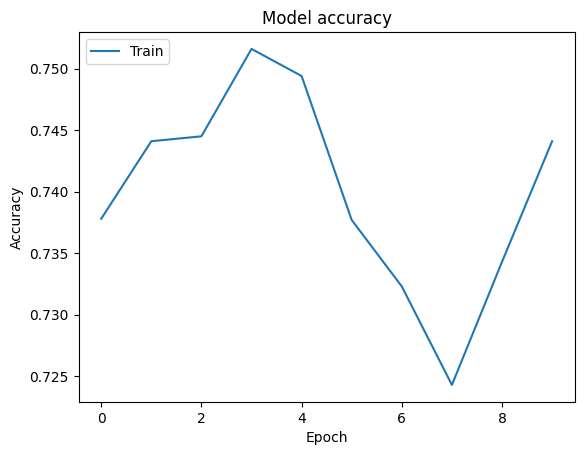

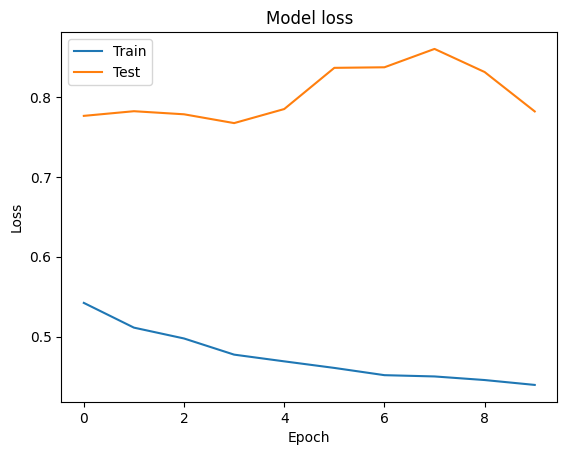

In [45]:
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()